In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Data Loading

In [2]:
# Load the data
df = pd.read_csv("insurance.csv")


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape

(1338, 7)

# Data cleaning

In [8]:
#Remove duplicates
#df = df.drop_duplicates()

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
numerical_cols=['age','bmi','charges']
categorical_cols=['sex','children','smoker','region']

# Handling outliers

In [11]:
#Outliers in 'age' column
def is_outlier(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound,upper_bound)
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

outliers = is_outlier('age', df.copy())
print(outliers)


-9.0 87.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [12]:
#Outliers in 'Body_mass_index(bmi)' column
def is_outlier(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound,upper_bound)
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

outliers = is_outlier('bmi', df.copy())
print(outliers)


13.7 47.290000000000006
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [13]:
#Outliers in 'children' column
def is_outlier(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound,upper_bound)
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

outliers = is_outlier('children', df.copy())
print(outliers)


-3.0 5.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [14]:
#Outliers in 'charges' column
def is_outlier(col, data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound,upper_bound)
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

outliers = is_outlier('charges', df.copy())
print(outliers)


-13109.1508975 34489.350562499996
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


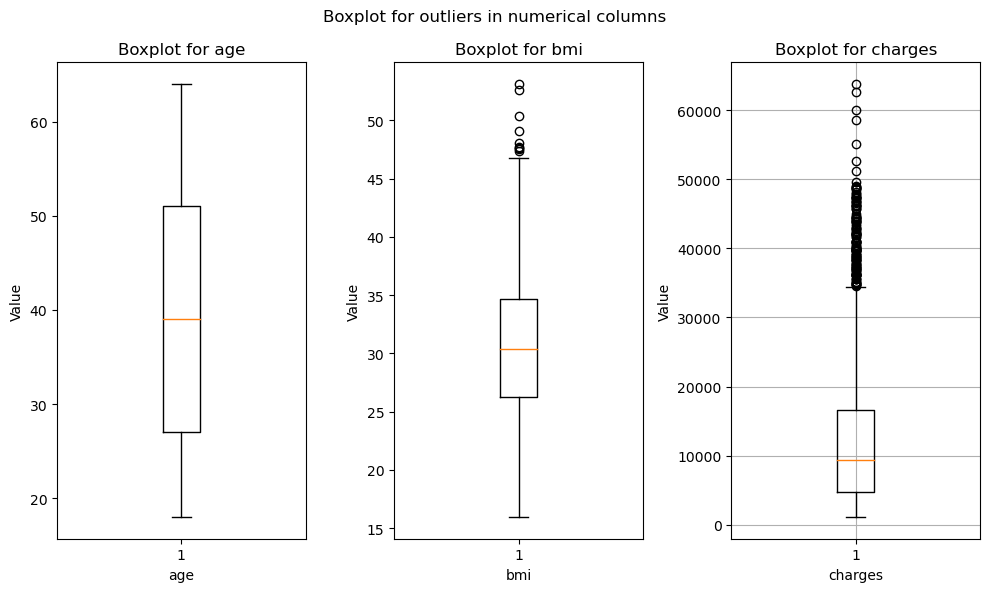

In [15]:
#Finding outliers using data visualization technique(boxplot)
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))  

# Create boxplots for numerical column
for i,col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1) 
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot for {col}')
plt.grid(True)
plt.suptitle("Boxplot for outliers in numerical columns")
plt.tight_layout()
plt.show()

In [16]:
X = df[["age", "sex", "bmi", "children", "smoker",'region']]  
y = df["charges"]


# Creating / doing one-hot encoding

In [17]:
numerical_data=df[['age','bmi']]
categorical_data = df[categorical_cols]

In [18]:
#import OneHotEncoder from sklearn
from sklearn.preprocessing import  OneHotEncoder

In [18]:
# Encode categorical variables (one-hot encoding)
encoder = OneHotEncoder(sparse=False) 
encoded_data = encoder.fit_transform(categorical_data)

transformed_data =pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


# Now you have your transformed data in 'transformed_data' DataFrame
transformed_data


C:\Users\vedas\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X=pd.concat([df[['age','bmi']],transformed_data],axis=1)
X

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Building Model

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create a linear regression model
model = LinearRegression()


In [27]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

# Testing Model

In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [29]:
y_pred

array([ 9684.26178343,  6997.99861417, 36827.76304973,  8733.95405207,
       26873.56330622, 10689.88806071,    97.9169309 , 16831.93658471,
        1089.85747212, 10494.52425573, 27408.16451119, 10014.57817301,
        5126.91013595, 37703.97858205, 40217.2479154 , 37767.06623937,
       15911.07219581, 35785.45953738,  8996.85167798, 31409.94509135,
        2617.62159811, 10800.32702314,  2304.49933521,  7084.59663492,
       10592.91257631, 12953.39292458, 14488.02886386,  5422.92837558,
       10677.62970885,  2113.97962641, 10683.27016486, 13020.50457198,
        4503.88877978,  2696.07710972,  4304.36450532, 12987.04616168,
        1839.73301601,  8688.06751241, 33136.85096368, 32437.14349949,
        2675.55855327,  4128.25719089, 14018.49731121, 11372.81530024,
        9430.25989068, 11980.56043514,  5904.52453409,  2459.80349285,
       34792.65863984,  9798.696241  , 15818.58499525,  2183.95281236,
       12176.97477271,  1438.38169314, 13354.83111392, 13266.14229109,
      

In [30]:
# Evaluate the model performance (e.g., R-squared, mean squared error)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.78
Mean Squared Error: 33756429.70


# Predictions

In [31]:
# Use the model to make predictions for new data points
new_data = {"age": 35, "sex": "male", "bmi": 25, "children": 2, "smoker": "yes","region":"northwest"} 
new_data_df = pd.DataFrame([new_data])


In [32]:
# Encode new categorical data following the same method used for training data
new_data_df_categorical = pd.DataFrame(encoder.transform(new_data_df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))


# Combine transformed data
data = pd.concat([new_data_df[['age','bmi']], new_data_df_categorical], axis=1)

data

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,35,25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [33]:
predicted_charge = model.predict(data)[0]
print(f"Predicted charge for new data: ${predicted_charge:.2f}")

Predicted charge for new data: $30250.19
